In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
address = '/Users/mattwilliams/Documents/LinkedInLearning/PythonDataAnalysis/Exercise Files/Ch7/07_02/names.zip'

In [4]:
import zipfile

In [5]:
zipfile.ZipFile(address).extractall('.')

In [6]:
import os

In [16]:
sorted(os.listdir('names'))

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [9]:
with open('names/yob1935.txt') as f:
    lines = f.readlines()[:10]
    print(lines)

['Mary,F,55067\n', 'Shirley,F,42357\n', 'Barbara,F,30690\n', 'Betty,F,28676\n', 'Patricia,F,22874\n', 'Dorothy,F,19400\n', 'Joan,F,18222\n', 'Margaret,F,14718\n', 'Nancy,F,14541\n', 'Helen,F,12778\n']


In [10]:
names2011 = pd.read_csv('names/yob2011.txt')

In [11]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


We need to specify column names here to prevent what's going on up there.

In [12]:
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])

In [13]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


We now need to load all names from each list starting in 1880 and ending in 2014.

In [18]:
names_all = []

for year in range(1880, 2014+1):
    file = 'names/yob{}.txt'.format(year)
    colnames = ['name', 'sex', 'number']
    names_all.append(pd.read_csv(file, names=colnames))
    names_all[-1]['year'] = year

In [23]:
len(names_all)

135

In [24]:
names_all[134]

,name,sex,number,year
0,Emma,F,20799,2014
1,Olivia,F,19674,2014
2,Sophia,F,18490,2014
3,Isabella,F,16950,2014
4,Ava,F,15586,2014
...,...,...,...,...
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014


In [25]:
allyears = pd.concat(names_all)

In [26]:
allyears.shape

(1825433, 4)

In [27]:
len(allyears)

1825433

In [28]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [29]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


# Multi-indexing the data

To be able to analyze the popularity of names over time, we will build a multi-index dataframe that indexes by gender, then name, then year.

In [34]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [35]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

We can see the result is a multi-indexed dataframe, sorted first by gender alphabetically, then name alphabetically, then year chronologically.

We can access specific names by using _loc_. For instance, to access all of the females named "Mary":

In [36]:
allyears_indexed.loc['F', 'Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [37]:
# Write a function to plot the populatity of a name over the years
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    plt.plot(data.index, data.values)

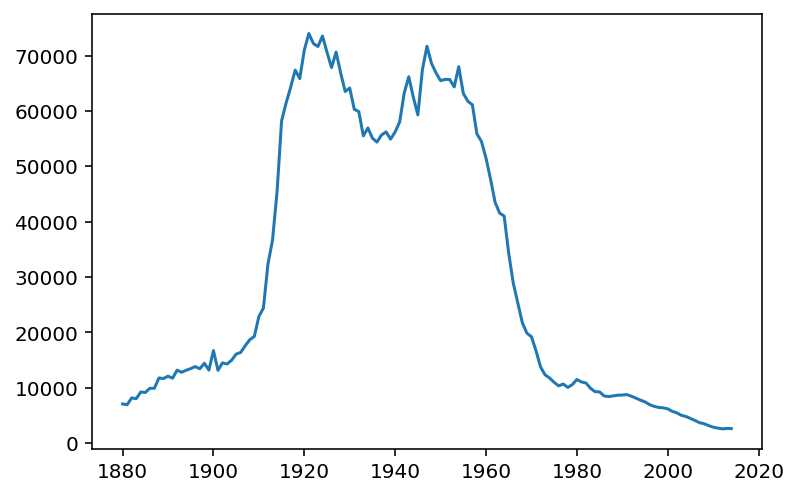

In [38]:
plotname('F', 'Mary')

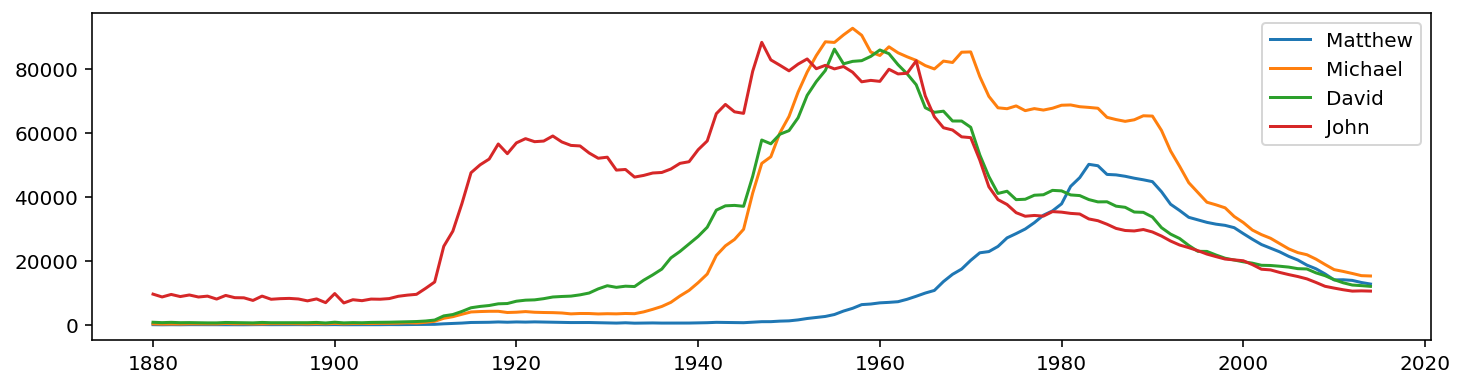

In [39]:
plt.figure(figsize=(12, 3))
names = ['Matthew', 'Michael', 'David', 'John']
for name in names:
    plotname('M', name)
plt.legend(names)

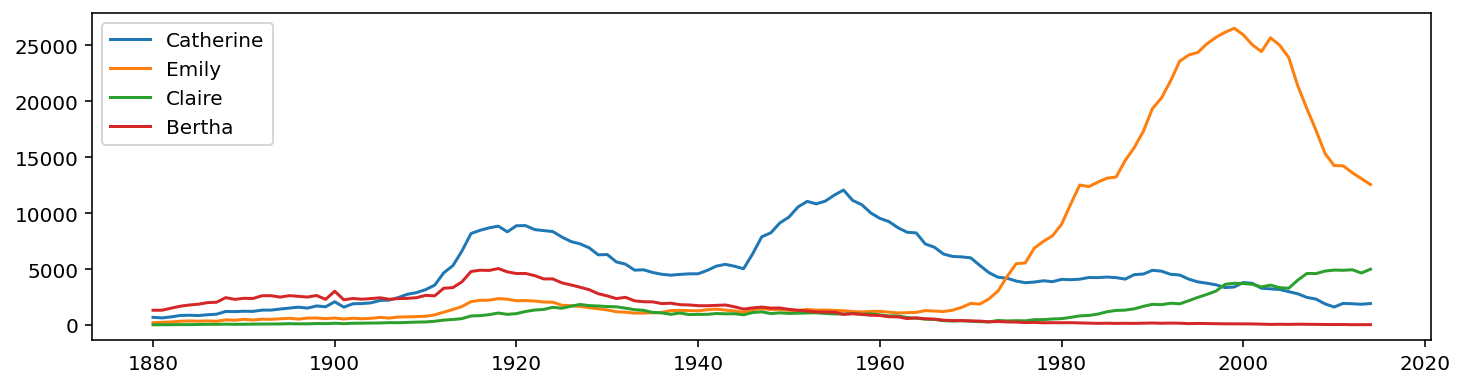

In [40]:
plt.figure(figsize=(12, 3))
names = ['Catherine', 'Emily', 'Claire', 'Bertha']
for name in names:
    plotname('F', name)
plt.legend(names)

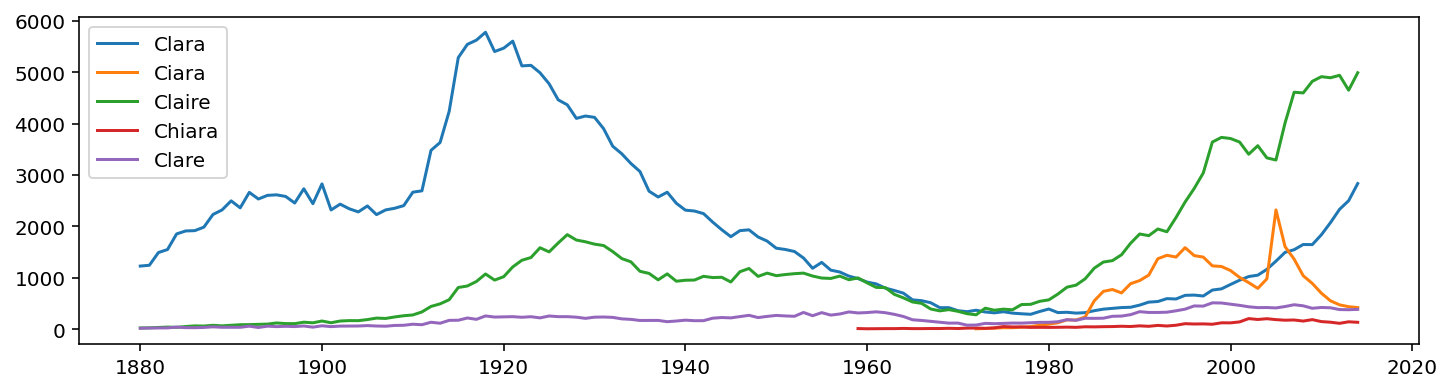

In [41]:
plt.figure(figsize=(12, 3))
names = ['Clara', 'Ciara', 'Claire', 'Chiara', 'Clare']
for name in names:
    plotname('F', name)
plt.legend(names)

In [42]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

To be able to make a frequency plot, we want to unstack the names from the index, which is the first level of indexing.

In [43]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    NaN   NaN   21.0  1226.0  15.0
1881    NaN   NaN   23.0  1242.0  20.0
1882    NaN   NaN   30.0  1490.0  21.0
1883    NaN   NaN   38.0  1548.0  22.0
1884    NaN   NaN   33.0  1852.0  38.0

In [44]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    0.0   0.0   21.0  1226.0  15.0
1881    0.0   0.0   23.0  1242.0  20.0
1882    0.0   0.0   30.0  1490.0  21.0
1883    0.0   0.0   38.0  1548.0  22.0
1884    0.0   0.0   33.0  1852.0  38.0

In [49]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

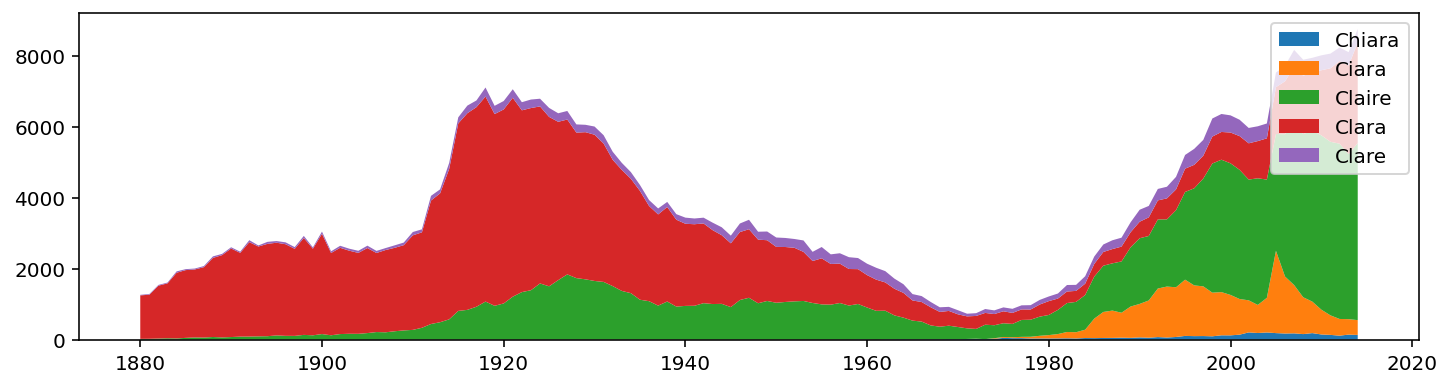

In [72]:
plt.figure(figsize=(12,3))
plt.stackplot(variants.index, variants.values.T, labels=sorted(names))
plt.legend(sorted(names))

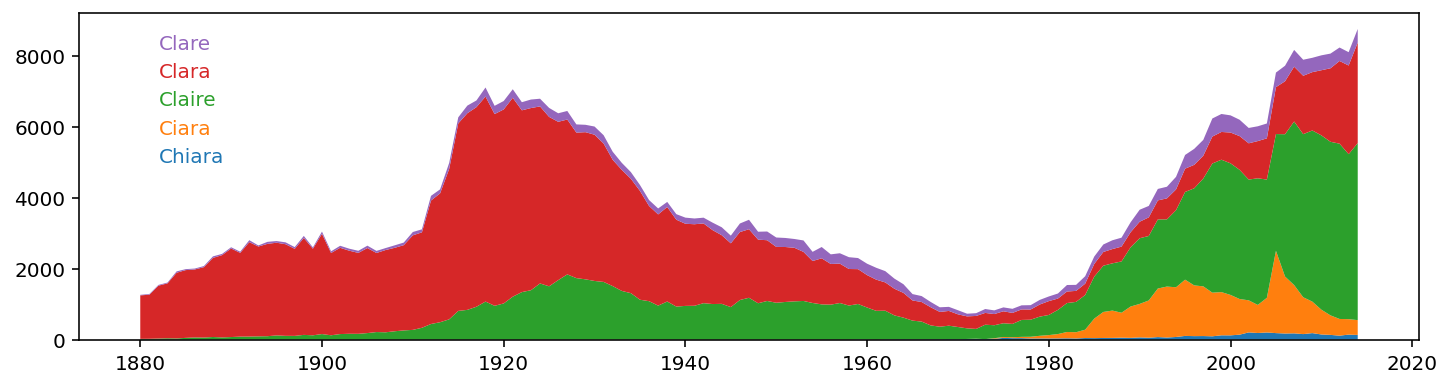

In [73]:
plt.figure(figsize=(12,3))

palette = sb.color_palette()
plt.stackplot(variants.index, variants.values.T, labels=names, colors = palette)
for i, name in enumerate(sorted(names)):
    plt.text(1882, 5000 + i*800, name, color=palette[i])

In [71]:
sorted(names)

['Chiara', 'Ciara', 'Claire', 'Clara', 'Clare']

Initially, the labels were not matching, because the names were not sorted, but the dataframe sorts the column names in alphabetical order. I needed to pass the sorted names list to the legend in order for it to label them correctly.

# Top ten names by year

In [80]:
allyears_indexed.loc['M', :, 2008].sort_values('number', ascending=False).head()

number
sex name    year        
M   Jacob   2008   22568
    Michael 2008   20590
    Ethan   2008   20196
    Joshua  2008   19186
    Daniel  2008   18985

In [81]:
pop2008 = allyears_indexed.loc['M', :, 2008].sort_values('number', ascending=False)

In [82]:
pop2008.reset_index().drop(['sex', 'year', 'number'], axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


Let's write a function to calculate the top ten names in a given year.

In [85]:
def topten(sex, year):
    topnames = allyears_indexed.loc[sex, :, year].sort_values('number', ascending=False).reset_index()
    topnames = topnames.drop(['sex', 'year', 'number'], axis=1).head(10)
    
    topnames.columns = [year]
    topnames.index += 1
    
    return topnames

In [98]:
topten('M', 2000)

,2000
1,Jacob
2,Michael
3,Matthew
4,Joshua
5,Christopher
6,Nicholas
7,Andrew
8,Joseph
9,Daniel
10,Tyler


Now, we'll write a function that evaluates a number of years at once and joins them into a dataframe.

In [99]:
def toptens(sex, year0, year1):
    years = [topten(sex, year) for year in range(year0, year1+1)]
    
    return years[0].join(years[1:])

In [100]:
toptens('M', 2000, 2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [103]:
toptens('F', 1985, 1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [102]:
toptens('F', 1985, 1995).stack().head(30)

1  1985     Jessica
   1986     Jessica
   1987     Jessica
   1988     Jessica
   1989     Jessica
   1990     Jessica
   1991      Ashley
   1992      Ashley
   1993     Jessica
   1994     Jessica
   1995     Jessica
2  1985      Ashley
   1986      Ashley
   1987      Ashley
   1988      Ashley
   1989      Ashley
   1990      Ashley
   1991     Jessica
   1992     Jessica
   1993      Ashley
   1994      Ashley
   1995      Ashley
3  1985    Jennifer
   1986      Amanda
   1987      Amanda
   1988      Amanda
   1989    Brittany
   1990    Brittany
   1991    Brittany
   1992      Amanda
dtype: object

In [104]:
toptens('F', 1985, 1995).stack().value_counts()

Jessica      11
Sarah        11
Amanda       11
Ashley       11
Elizabeth    11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Megan         3
Taylor        3
Lauren        2
Hannah        1
dtype: int64

In [105]:
popular = toptens('F', 1985, 1995).stack().value_counts().index[:6]

In [107]:
popular

Index(['Jessica', 'Sarah', 'Amanda', 'Ashley', 'Elizabeth', 'Brittany'], dtype='object')

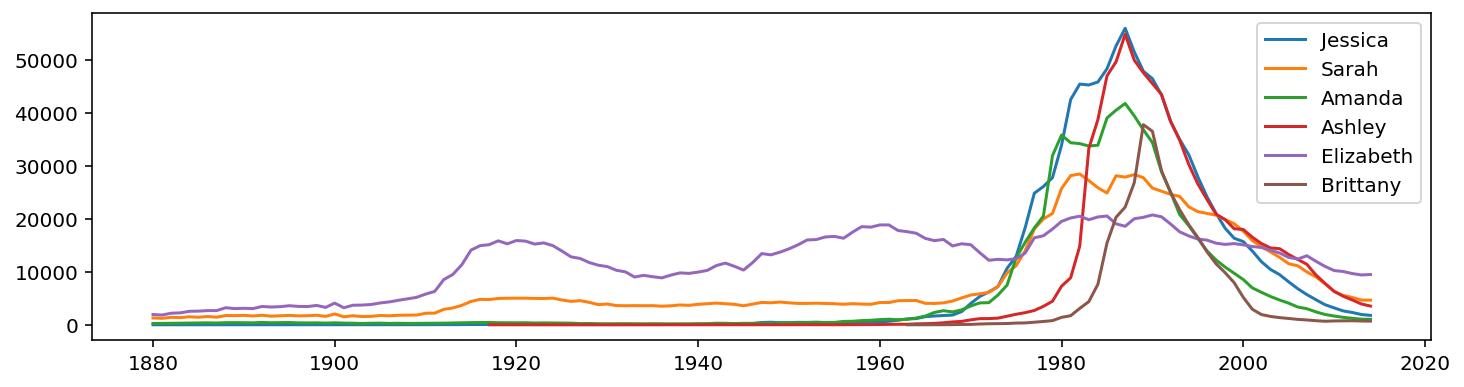

In [109]:
plt.figure(figsize=(12, 3))
for name in popular:
    plotname('F', name)
plt.legend(popular)

# Uncovering fads

In [110]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [111]:
allyears.groupby(['sex', 'name']).head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33036,Zo,M,5,2014
33038,Zyel,M,5,2014
33040,Zymeer,M,5,2014
33042,Zyran,M,5,2014


In [112]:
allyears.groupby(['sex', 'name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [113]:
allyears.groupby(['sex', 'name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [119]:
totals = allyears.groupby(['sex', 'name'])['number'].sum()

In [120]:
def sumsq(x):
    return sum(x**2)

In [121]:
spikyness = allyears.groupby(['sex', 'name'])['number'].agg(sumsq) / totals**2

In [122]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [123]:
spiky_common = spikyness[totals > 5000].copy()

In [129]:
spiky_common.sort_values(ascending=False).head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [130]:
spiky_common.sort_values(ascending=False).tail(10)

sex  name   
F    Minerva    0.008853
     Nina       0.008752
     Celia      0.008639
M    Will       0.008635
     Hiram      0.008618
F    Rosa       0.008512
     Mollie     0.008437
M    Ike        0.008310
F    Delia      0.008263
     Louisa     0.007931
Name: number, dtype: float64

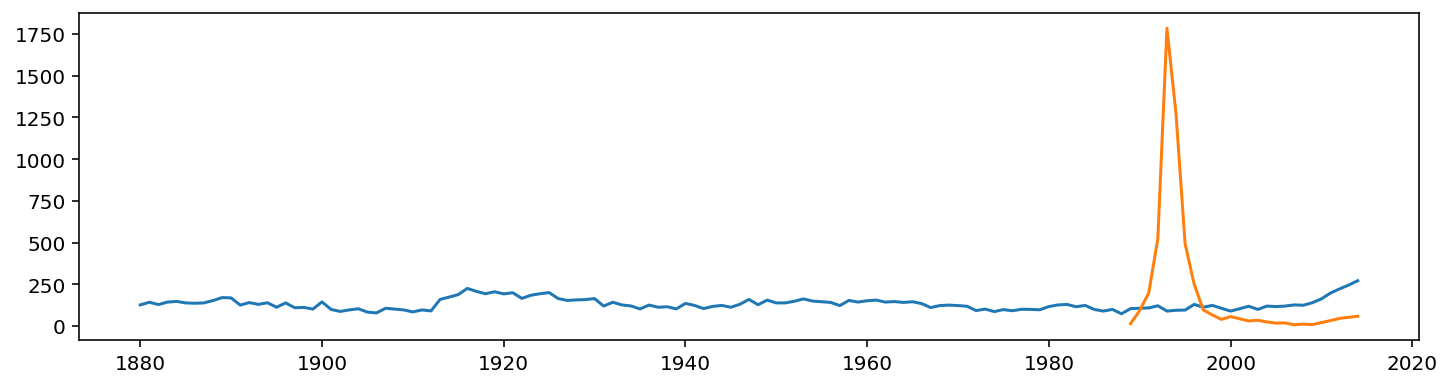

In [132]:
plt.figure(figsize=(12, 3))
plotname('F', 'Louisa')
plotname('M', 'Shaquille')

In [150]:
fads = spiky_common.sort_values(ascending=False).head(10).index.values

In [151]:
fads

array([('M', 'Shaquille'), ('F', 'Katina'), ('F', 'Krystle'),
       ('M', 'Devante'), ('F', 'Khadijah'), ('F', 'Shanice'),
       ('F', 'Iesha'), ('F', 'Shaniqua'), ('F', 'Sheena'),
       ('F', 'Marquita')], dtype=object)

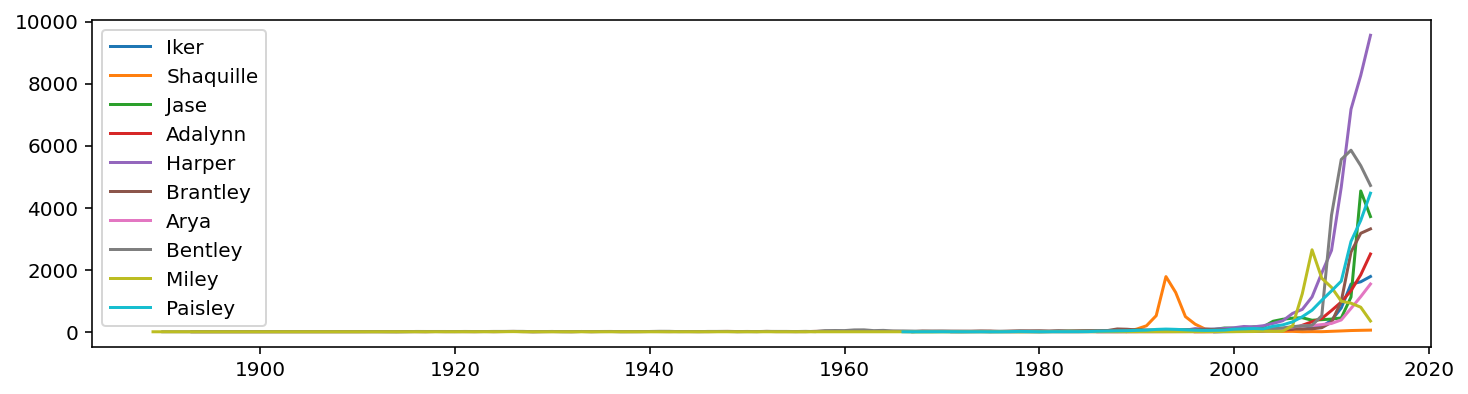

In [142]:
plt.figure(figsize=(12, 3))

for sex, name in fads:
    plotname(sex, name)
plt.legend([name for sex, name in fads])

In [144]:
totals_recent = allyears[allyears['year']>2005].groupby(['sex', 'name'])['number'].sum()

In [145]:
spiky_common = spikyness[(totals > 5000) & (totals_recent< 1000)].copy()

In [146]:
spiky_common.sort_values(ascending=False).head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

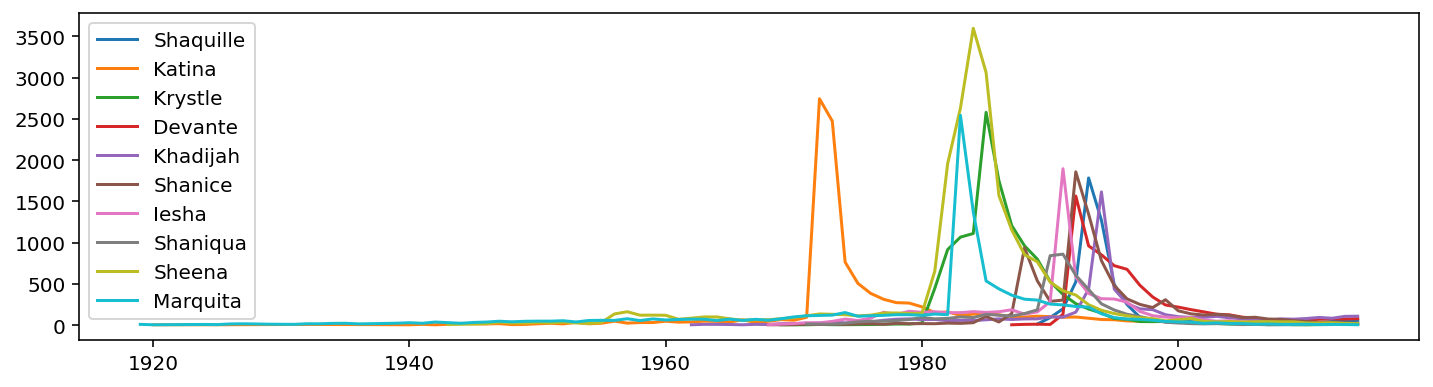

In [147]:
fads = spiky_common.sort_values(ascending=False).head(10).index.values
plt.figure(figsize=(12, 3))

for sex, name in fads:
    plotname(sex, name)
plt.legend([name for sex, name in fads])

# Challenge

The challenge here is to find unisex names that have a ratio of less than 4-1 in either direction.

In [152]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [157]:
allyears.groupby(['sex', 'name']).head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33036,Zo,M,5,2014
33038,Zyel,M,5,2014
33040,Zymeer,M,5,2014
33042,Zyran,M,5,2014


In [159]:
allyears.groupby(['sex', 'name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

This gives the total number of appearances of each name over the entire dataset.

In [168]:
totals = allyears.groupby(['sex', 'name'])['number'].sum()

In [193]:
totals.loc['F']

name
Aabha         21
Aabriella     10
Aaden          5
Aadhira       29
Aadhya       639
            ... 
Zyriel        10
Zyrielle      22
Zyrihanna     45
Zyriyah       11
Zyyanna        6
Name: number, Length: 64911, dtype: int64

In [170]:
totals_F = totals['F']
totals_M = totals['M']

In [195]:
totals_M['Aaban']

72

In [205]:
unisex_names = []
for name in totals_F.index:
    if name in totals_M.index:
        countF = totals_F[name]
        countM = totals_M[name]
        unisex_names.append((name, countF, countM))

In [222]:
len(unisex_names)

10221

In [224]:
unisex_names[:5]

[('Aaden', 5, 3915),
 ('Aadi', 16, 667),
 ('Aadyn', 16, 387),
 ('Aalijah', 107, 155),
 ('Aaliyah', 69833, 84)]

In [227]:
unisex_names_filtered = []
for tup in unisex_names:
    name, i, j = tup
    larger = max(i, j)
    smaller = min(i, j)
    if larger/smaller < 4:
        unisex_names_filtered.append(name)

In [228]:
len(unisex_names_filtered)

3050

In [229]:
unisex_names_filtered[:10]

['Aalijah',
 'Aamari',
 'Aaren',
 'Aareon',
 'Aarian',
 'Aarin',
 'Aarion',
 'Aaris',
 'Aarya',
 'Aaryn']

In [232]:
unisex_names_filtered[-10:]

['Zikora',
 'Zixuan',
 'Ziyan',
 'Zoel',
 'Zohar',
 'Zyaire',
 'Zyan',
 'Zyian',
 'Zyon',
 'Zyree']

# Challenge Solution
1. Solved for the totals just like I did
2. Unstacks the totals dataframe by sex

In [233]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


This will allow those names that are not used for both sexes to result in NaN when the ratio is taken.

3. Take the ratio of the columns.

In [234]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [235]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [236]:
totals_both = totals_bysex.sum(axis=1)

In [237]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [238]:
unisex = (ratio > 0.25) & (ratio < 4)

In [239]:
unisex.head()

name
Aaban        False
Aabha        False
Aabid        False
Aabriella    False
Aadam        False
dtype: bool

In [240]:
totals_both = totals_both[unisex]

In [241]:
totals_both.head()

name
Aalijah    262.0
Aamari     155.0
Aaren      999.0
Aareon      43.0
Aarian     116.0
dtype: float64

In [242]:
totals_both.sort_values(ascending=False)

name
Willie       593888.0
Jordan       479434.0
Taylor       416096.0
Leslie       376587.0
Jamie        350262.0
               ...   
Rochon           10.0
Chaffee          10.0
Raydean          10.0
Murtha           10.0
Dominquie        10.0
Length: 3050, dtype: float64

In [250]:
names = totals_both.sort_values(ascending=False).head(10).index.values

In [251]:
names

array(['Willie', 'Jordan', 'Taylor', 'Leslie', 'Jamie', 'Angel', 'Lee',
       'Jessie', 'Marion', 'Dana'], dtype=object)

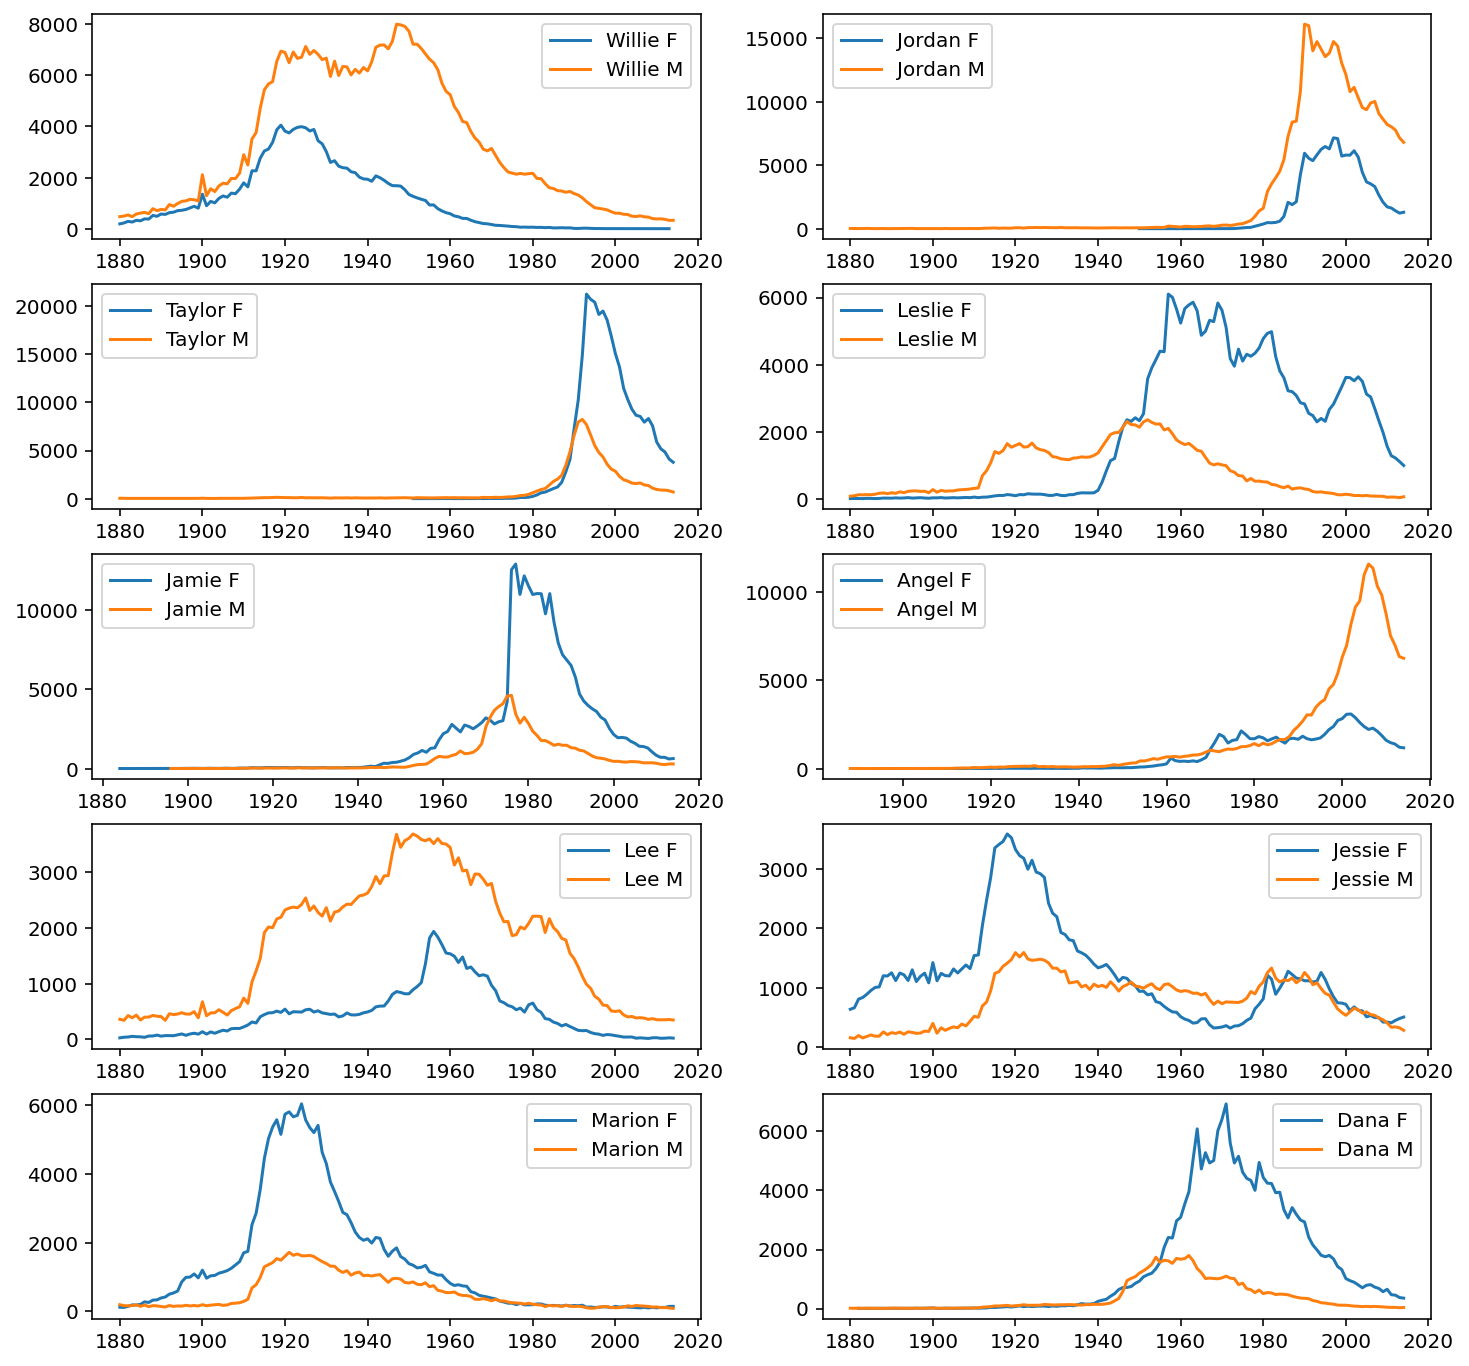

In [253]:
plt.figure(figsize=(12,12))

for i, name in enumerate(names):
    plt.subplot(5, 2, i+1)
    plotname('F', name)
    plotname('M', name)
    plt.legend([name + ' F', name + ' M'])

In [266]:
len(totals_both)

3050